In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [104]:
#Importing the data
student = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [105]:
#To get a summary of basic statistics for numerical and categorical variables
student.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [106]:
#Check for missing values
print(student.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


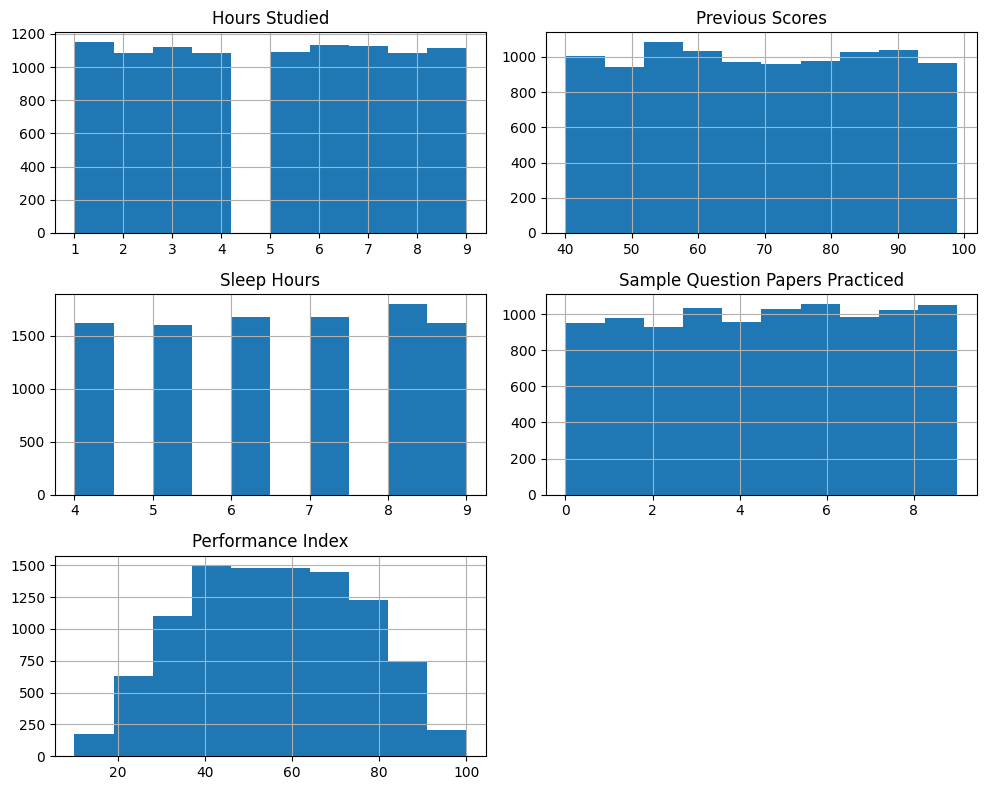

In [107]:
#To visualize the data
student[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

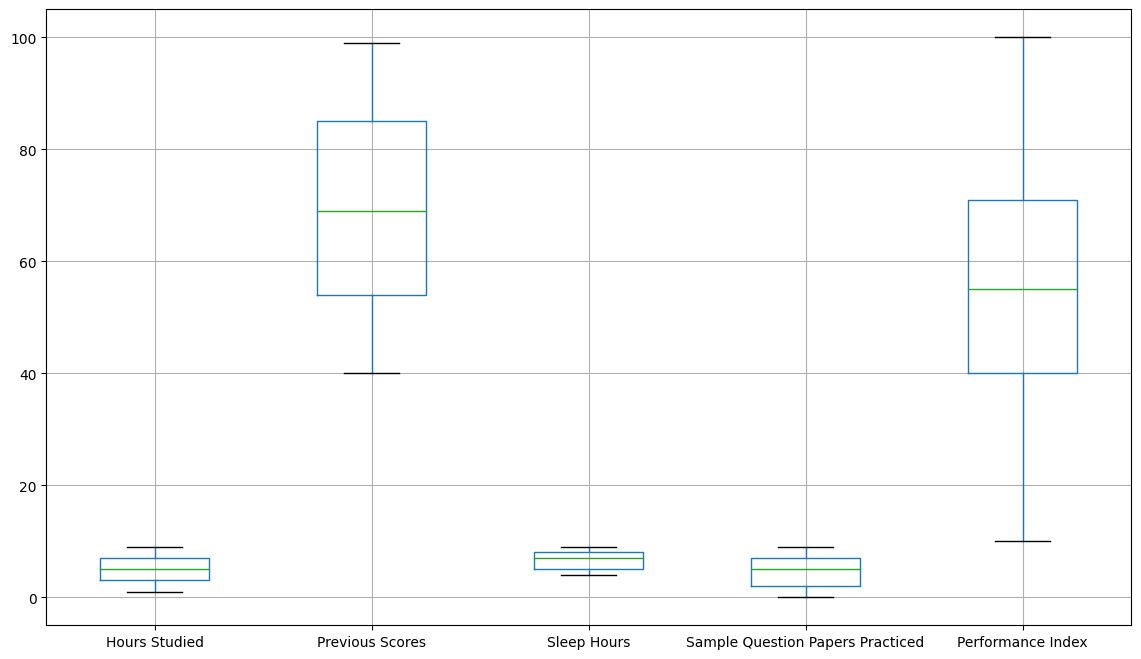

In [108]:
#To define the outliers
student[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].boxplot(figsize=(14,8))
plt.show()

<Axes: >

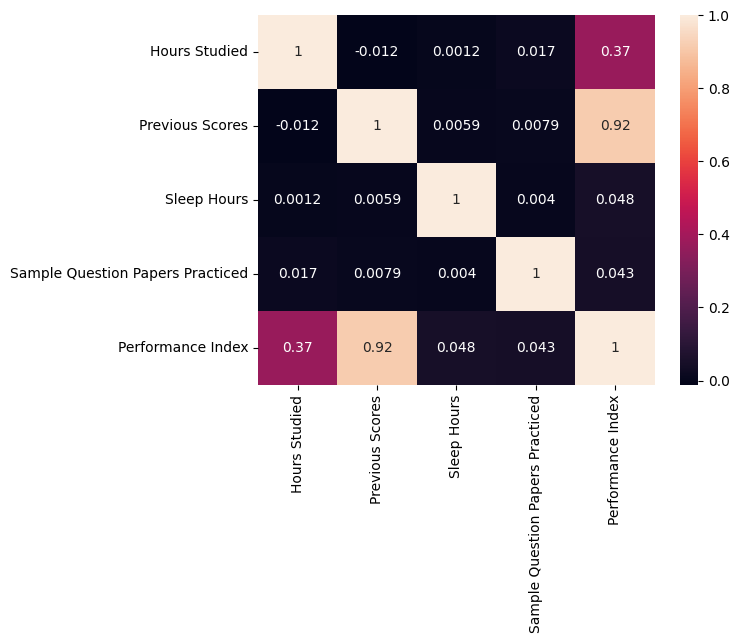

In [109]:
#Correlation analysis
corr = student.drop(columns=['Extracurricular Activities']).corr()
sns.heatmap(corr, annot=True)
#Looks like Sample questions papers Practiced and Sleep hours does not correlate well with performance index, we will keep them for now.

In [110]:
#Converting categorical features to numerical  (one-hot encoding)
student_one_hot = pd.get_dummies(student)
student_one_hot.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,False,True
1,4,82,4,2,65.0,True,False
2,8,51,7,2,45.0,False,True
3,5,52,5,2,36.0,False,True
4,7,75,8,5,66.0,True,False


In [111]:
X = student_one_hot.drop("Performance Index", axis=1)
y = student_one_hot["Performance Index"]

In [112]:
#We will build the model without normalization first
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
#Checking the shape of train and test dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 6), (2000, 6), (8000,), (2000,))

In [114]:
#Converting all data to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [115]:
#Building first simple neural regression model
import tensorflow as tf

tf.random.set_seed(42)

student_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

student_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

history1 = student_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26.5222 - mae: 26.5222
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8991 - mae: 24.8991
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8716 - mae: 24.8716
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8846 - mae: 24.8846
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8842 - mae: 24.8842
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8621 - mae: 24.8621
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.9551 - mae: 24.9551
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.9115 - mae: 24.9115
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.9306 - mae: 24.9306
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.9322 - mae: 24.9322
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.9228 - mae: 24.9228
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.9129 - ma

In [116]:
#Evaluating first model on test dataset
student_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34.8575 - mae: 34.8575 


[35.28904724121094, 35.28904724121094]

In [117]:
#Predicting valeus based on first model
y_preds = student_model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

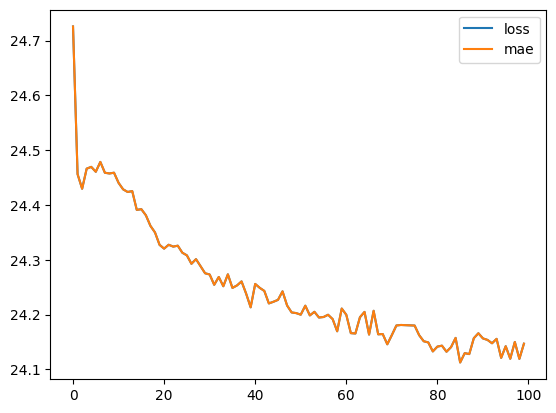

In [118]:
#Plotting loss curve
pd.DataFrame(history1.history).plot()

In [119]:
#Defining function to plot y_test against y_preds
def plot_predictions(y_test, y_preds):
  plt.scatter(y_test, y_preds)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.title('Predicted vs Actual')
  plt.show()


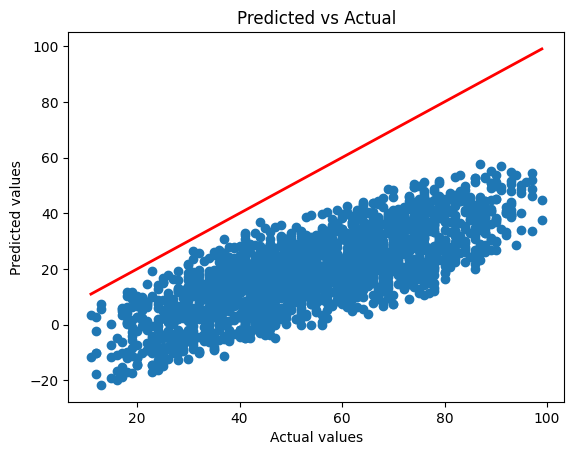

In [120]:
plot_predictions(y_test, y_preds)

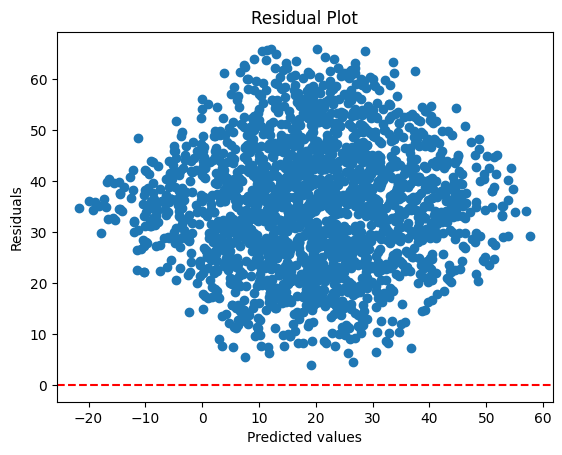

In [121]:
#Function to plot residuals
residuals = y_test - y_preds.flatten()
plt.scatter(y_preds, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [122]:
#Calculating r2_score of the first model
from sklearn.metrics import r2_score

r2_score(y_test, y_preds)

-2.7739469309012117

In [123]:
#Building better model
tf.random.set_seed(42)

student_model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

student_model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history2 = student_model2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.6843 - mae: 11.6843
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3397 - mae: 4.3397
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8360 - mae: 3.8360
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1710 - mae: 3.1710
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2967 - mae: 2.2967
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8135 - mae: 1.8135
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8138 - mae: 1.8138
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7639 - mae: 1.7639
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7444 - mae: 1.7444
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7477 - mae: 1.7477
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8256 - mae: 1.8256
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8255 - mae: 1.8255
Epoch 13/10

In [124]:
#Evaluating the second model
student_model2.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7054 - mae: 1.7054 


[1.6975475549697876, 1.6975475549697876]

In [125]:
#Predicting values based on the second model
y_preds = student_model2.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: >

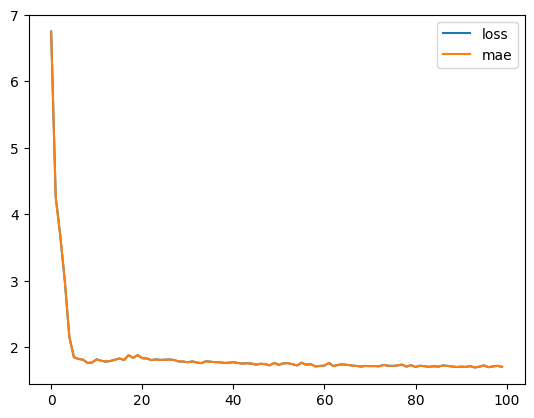

In [126]:
#Plotting loss curve
pd.DataFrame(history2.history).plot()

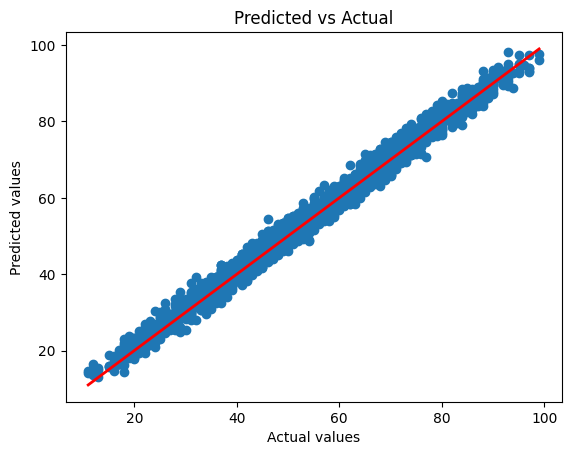

In [127]:
#Plotting predicted vs Actual curve
plot_predictions(y_test, y_preds)

In [128]:
#Calculating r2_score
r2_score(y_test, y_preds)

0.9878437889770016

In [129]:
student_one_hot.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,False,True
1,4,82,4,2,65.0,True,False
2,8,51,7,2,45.0,False,True
3,5,52,5,2,36.0,False,True
4,7,75,8,5,66.0,True,False


**98.7% Accuracy, now we will try to build last model with less features and normalized data**

In [130]:
# We will ignore sleep hours and sample question papers practiced columns
X2 = student_one_hot[['Previous Scores', 'Hours Studied', 'Extracurricular Activities_No', 'Extracurricular Activities_Yes']]
y2 = student_one_hot['Performance Index']

In [131]:
#Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train2)
X_test_norm = scaler.transform(X_test2)

In [133]:
#Building new model with less features and normalized data.
tf.random.set_seed(42)

student_model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

student_model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)


history3 = student_model3.fit(X_train_norm, y_train2, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23.4659 - mae: 23.4659
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0027 - mae: 2.0027
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9957 - mae: 1.9957
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9860 - mae: 1.9860
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0211 - mae: 2.0211
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0406 - mae: 2.0406
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9880 - mae: 1.9880
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0050 - mae: 2.0050
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9849 - mae: 1.9849
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0172 - mae: 2.0172
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9846 - mae: 1.9846
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9476 - mae: 1.9476
Epoch 13/10

In [134]:
#Evaluating the third model
student_model3.evaluate(X_test_norm, y_test2)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9075 - mae: 1.9075


[1.8469277620315552, 1.8469277620315552]

In [135]:
#Predicting values
y_preds3 = student_model3.predict(X_test_norm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


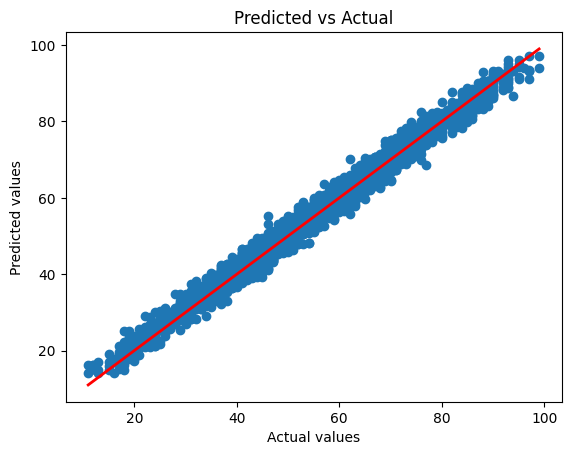

In [137]:
plot_predictions(y_test2, y_preds3)

In [136]:
#Calculating r2_score
r2_score(y_test2, y_preds3)

0.9855383138726391